In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving book.csv to book.csv


In [3]:
raw_data = pd.read_csv('book.csv', encoding='ISO-8859-1')
raw_data

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


#Descriptive Analysis

In [4]:
data = pd.DataFrame(raw_data,columns=['User.ID','Book.Title','Book.Rating'])
data.rename(columns={'User.ID':'user id','Book.Title':'Book Title','Book.Rating':'Book Rating'}, inplace=True)
data.head()

,user id,Book Title,Book Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user id      10000 non-null  int64 
 1   Book Title   10000 non-null  object
 2   Book Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [6]:
data.describe()

,user id,Book Rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [7]:
data.isna().sum()

user id        0
Book Title     0
Book Rating    0
dtype: int64

In [8]:
data[data.duplicated()]

,user id,Book Title,Book Rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [9]:
len(data['user id'].unique())

2182

In [10]:
len(data['Book Title'].unique())

9659

In [11]:
data['Book Rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book Rating, dtype: int64

In [12]:
ratings = pd.DataFrame(data.groupby('Book Title')['Book Rating'].mean())
ratings['Count'] = pd.DataFrame(data.groupby('Book Title')['Book Rating'].count())
ratings.head()

,Book Rating,Count
Book Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


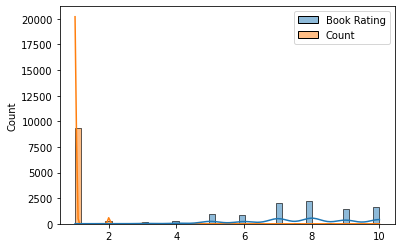

In [13]:
sns.histplot(ratings,bins=50,kde=True)
plt.show()

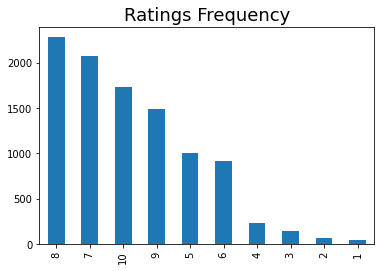

In [14]:
data['Book Rating'].value_counts().plot(kind='bar')
plt.title('Ratings Frequency',  fontsize = 18)
plt.show()

#EDA

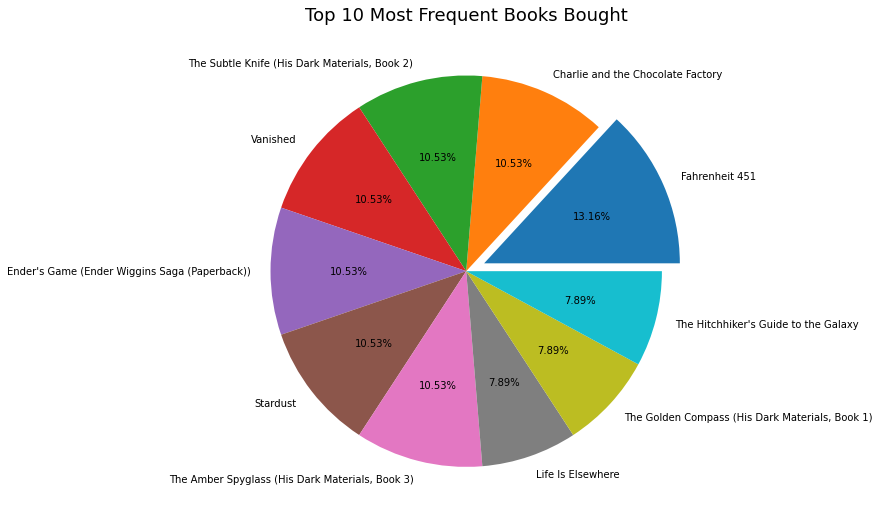

In [15]:
top = data['Book Title'].value_counts().head(10)

plt.figure(figsize = (16,9))
plt.pie(top,
       labels=top.index,
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%')
plt.title("Top 10 Most Frequent Books Bought", fontsize = 18)
plt.show()

#Collaborative Book Recommendation System

Pivot Table

In [16]:
books = data.pivot_table(index='user id',columns = 'Book Title', values = 'Book Rating').fillna(0)
books

Book Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
user id,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [17]:
stardust_ratings = books['Stardust']
fahrenheit_ratings = books['Fahrenheit 451']

corr_to_stardust = books.corrwith(stardust_ratings)
corr_to_fahrenheit = books.corrwith(fahrenheit_ratings)

In [18]:
corr_stardust = pd.DataFrame(corr_to_stardust,columns=['Correlation'])
corr_stardust.head()

,Correlation
Book Title,
"Jason, Madison &amp",-0.000913
Other Stories;Merril;1985;McClelland &amp,-0.000913
Repairing PC Drives &amp,-0.000913
'48,-0.000913
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000913


In [19]:
corr_fahrenheit = pd.DataFrame(corr_to_fahrenheit,columns=['Correlation'])
corr_fahrenheit.dropna(inplace=True)
corr_fahrenheit.head()

,Correlation
Book Title,
"Jason, Madison &amp",-0.000958
Other Stories;Merril;1985;McClelland &amp,-0.000958
Repairing PC Drives &amp,-0.000958
'48,-0.000958
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000958


#Recommendation System Using Cosine Similarity

In [20]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [21]:
user_sim = 1 - pairwise_distances(books.values, metric = 'cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [22]:
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
np.fill_diagonal(user_sim, 0)


In [26]:
user_sim_df.index = list(books.index)
user_sim_df.columns = list(books.index)
user_sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Most Similar Users
user_sim_df.idxmax(axis=1)

8              8
9              8
10             8
12             8
14             8
           ...  
278846         8
278849         8
278851    278202
278852         8
278854         8
Length: 2182, dtype: int64

In [28]:
data[(data['user id']==8) | (data['user id']==14)]

,user id,Book Title,Book Rating
2399,8,Ancient Celtic Romances,5
2400,8,The Western way: A practical guide to the West...,5
2401,8,Wings,5
2402,8,Truckers,5
2403,8,Keepers of the Earth Teachers Guide,6
2404,8,The Celts Activity Book,6
2405,8,The Art Of Celtia,7
2409,14,COPS,5
2410,14,A Cold Heart: An Alex Delaware Novel,5
2411,14,Dead Sleep,6


In [30]:
user_1=data[(data['user id']==8)]
user_2=data[(data['user id']==14)]

In [32]:
user_1['Book Title']

2399                              Ancient Celtic Romances
2400    The Western way: A practical guide to the West...
2401                                                Wings
2402                                             Truckers
2403                  Keepers of the Earth Teachers Guide
2404                              The Celts Activity Book
2405                                    The Art Of Celtia
Name: Book Title, dtype: object

In [33]:
user_2['Book Title']

2409                                    COPS
2410    A Cold Heart: An Alex Delaware Novel
2411                              Dead Sleep
Name: Book Title, dtype: object

In [34]:
pd.merge(user_1,user_2,on='Book Title',how='outer')

,user id_x,Book Title,Book Rating_x,user id_y,Book Rating_y
0,8.0,Ancient Celtic Romances,5.0,NaN,NaN
1,8.0,The Western way: A practical guide to the West...,5.0,NaN,NaN
2,8.0,Wings,5.0,NaN,NaN
3,8.0,Truckers,5.0,NaN,NaN
4,8.0,Keepers of the Earth Teachers Guide,6.0,NaN,NaN
5,8.0,The Celts Activity Book,6.0,NaN,NaN
6,8.0,The Art Of Celtia,7.0,NaN,NaN
7,NaN,COPS,NaN,14.0,5.0
8,NaN,A Cold Heart: An Alex Delaware Novel,NaN,14.0,5.0
9,NaN,Dead Sleep,NaN,14.0,6.0


**Hence, we can see the top recommended books by Recommendation System using Cosine Similarity.**